<a href="https://colab.research.google.com/github/hggutvik/inf626-project/blob/main/inf626_project_hallgeir_garnes_gutvik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project is based on the [mushroom dataset from Kaggle](https://www.kaggle.com/datasets/uciml/mushroom-classification)




In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
# Import data
url = "https://raw.githubusercontent.com/hggutvik/inf626-project/main/mushrooms.csv"
raw = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

In [5]:
# Data exploration
raw.shape

(8124, 23)

In [6]:
raw.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [7]:
raw.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
raw.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [10]:
# Drop column 'class' and replace it with a rightmost target column indicating "edibleness" in binary digits
raw["edible"] = [ 1 if val == "e" else 0 for val in raw["class"] ]
data = raw.drop("class", axis="columns")
data

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,edible
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,0
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,1
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,1
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,0
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,1
8120,x,s,n,f,n,a,c,b,y,e,...,o,o,p,n,o,p,b,v,l,1
8121,f,s,n,f,n,a,c,b,n,e,...,o,o,p,o,o,p,b,c,l,1
8122,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,0


In [11]:
# Function to split the data into train, valdation and test set with split ratios { train+val: 80%, test: 20%}
def split_data_set(x, y): 
  return train_test_split(x,y, test_size=0.2)


In [ ]:
# TODO: remove these if current way of splitting data sets is OK
# x_val, x_train, y_val, y_train = train_test_split(x_val_train_set, y_val_train_set, test_size=0.4)
# x_train = train_set.drop(target_col_name, axis=1).to_numpy()
# y_train = train_set[target_col_name].to_numpy()
# x_val = val_set.drop(target_col_name, axis=1).to_numpy() 
# y_val = val_set[target_col_name].to_numpy()
# x_test =test_set.drop(target_col_name, axis=1).to_numpy() 
# y_test = test_set[target_col_name].to_numpy()


In [12]:
def display_scores(model, scores):
    print("Model: ", model)
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    print("************************************")


In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

# Make pipeline with onehot-encoder as column-transformer for passed columns
def make_pipeline_for_model(model, encode_columns):
  transformer1 = make_column_transformer((OneHotEncoder(drop="first", sparse=False ), encode_columns))
  pipe = make_pipeline(transformer1, model)
  
  return pipe

# Make and fit a pipeline for the passed model, and display its results from cross_val_score
def evaluate_model(title, model, x_train, y_train):
  pipe = make_pipeline_for_model(model, x_train.columns)
  pipe.fit(x_train, y_train)

  scores = cross_val_score(pipe, x_train, y_train)
  display_scores(title, scores)

# Filter original dataset for selected feature columns
# (might be useful if we later want to build a model using sparser set of features, e.g. dropping non-important features)
def get_filtered_dataset_for_feature_cols(feature_cols):
  data_with_features_and_target = data.get([*feature_cols, "edible"])
  x = data_with_features_and_target.drop("edible", axis="columns")
  y = data_with_features_and_target["edible"]

  return split_data_set(x, y)

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [22]:
all_feature_cols = data.columns[:-1] # Exclude last target column
x_val_train_set_complete, x_test_complete, y_val_train_set_complete, y_test_complete = get_filtered_dataset_for_feature_cols(all_feature_cols)

# Compare classifier models

evaluate_model("Logistic Regression", LogisticRegression(random_state=0), x_val_train_set_complete, y_val_train_set_complete)
evaluate_model("Decision tree", DecisionTreeRegressor(),x_val_train_set_complete, y_val_train_set_complete)
evaluate_model("Naive Bayes", GaussianNB(),x_val_train_set_complete, y_val_train_set_complete)

Model:  Logistic Regression
Scores: [0.99846154 0.99923077 1.         0.99923077 1.        ]
Mean: 0.9993846153846153
Standard deviation: 0.000575639597965203
************************************
Model:  Decision tree
Scores: [1.         0.99691955 1.         1.         1.        ]
Mean: 0.9993839096148014
Standard deviation: 0.001232180770397351
************************************
Model:  Naive Bayes
Scores: [0.94692308 0.95153846 0.95846154 0.93769231 0.94919169]
Mean: 0.948761414105525
Standard deviation: 0.006751209360967238
************************************


In [29]:
# Fine-tuning Decision Tree using some different params

from sklearn.model_selection import GridSearchCV

param_grid = {
    'decisiontreeregressor__max_leaf_nodes': [2,4,6,10,14],
    'decisiontreeregressor__max_depth': [2,4,6,10,14]
}

pipe = make_pipeline_for_model(DecisionTreeRegressor(), x_val_train_set_complete.columns)

grid_search = GridSearchCV(pipe, [param_grid], cv=5)
grid_search.fit(x_val_train_set_complete, y_val_train_set_complete)

# Test the grid_search score using test set
test_score = grid_search.score(x_test_complete, y_test_complete)

print("Score for tuned model on the test set:",test_score)
print("Best parameters: ",grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
print("Best estimator: ", grid_search.best_estimator_)



Score for tuned model on the test set: 1.0
Best parameters:  {'decisiontreeregressor__max_depth': 10, 'decisiontreeregressor__max_leaf_nodes': 14}
Best score:  0.9993838383480181
Best estimator:  Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object'))])),
                ('decisiontreeregressor',
                 Dec

In [30]:
from sklearn.metrics import mean_squared_error

def display_evauluation_metrics(model, x, y):
  predictions = model.predict(x)
  final_mse = mean_squared_error(y, predictions)
  final_rmse = np.sqrt(final_mse)
  
  accuracy = model.score(x, y)

  print("Root mean square error: ", final_rmse)
  print("Accuracy: ", accuracy)





In [31]:
# Make predictions on test set using tuned decision tree, and display evaluation metrics
final_pipeline_model = grid_search.best_estimator_
display_evauluation_metrics(final_pipeline_model, x_test_complete, y_test_complete)

Root mean square error:  0.0
Accuracy:  1.0


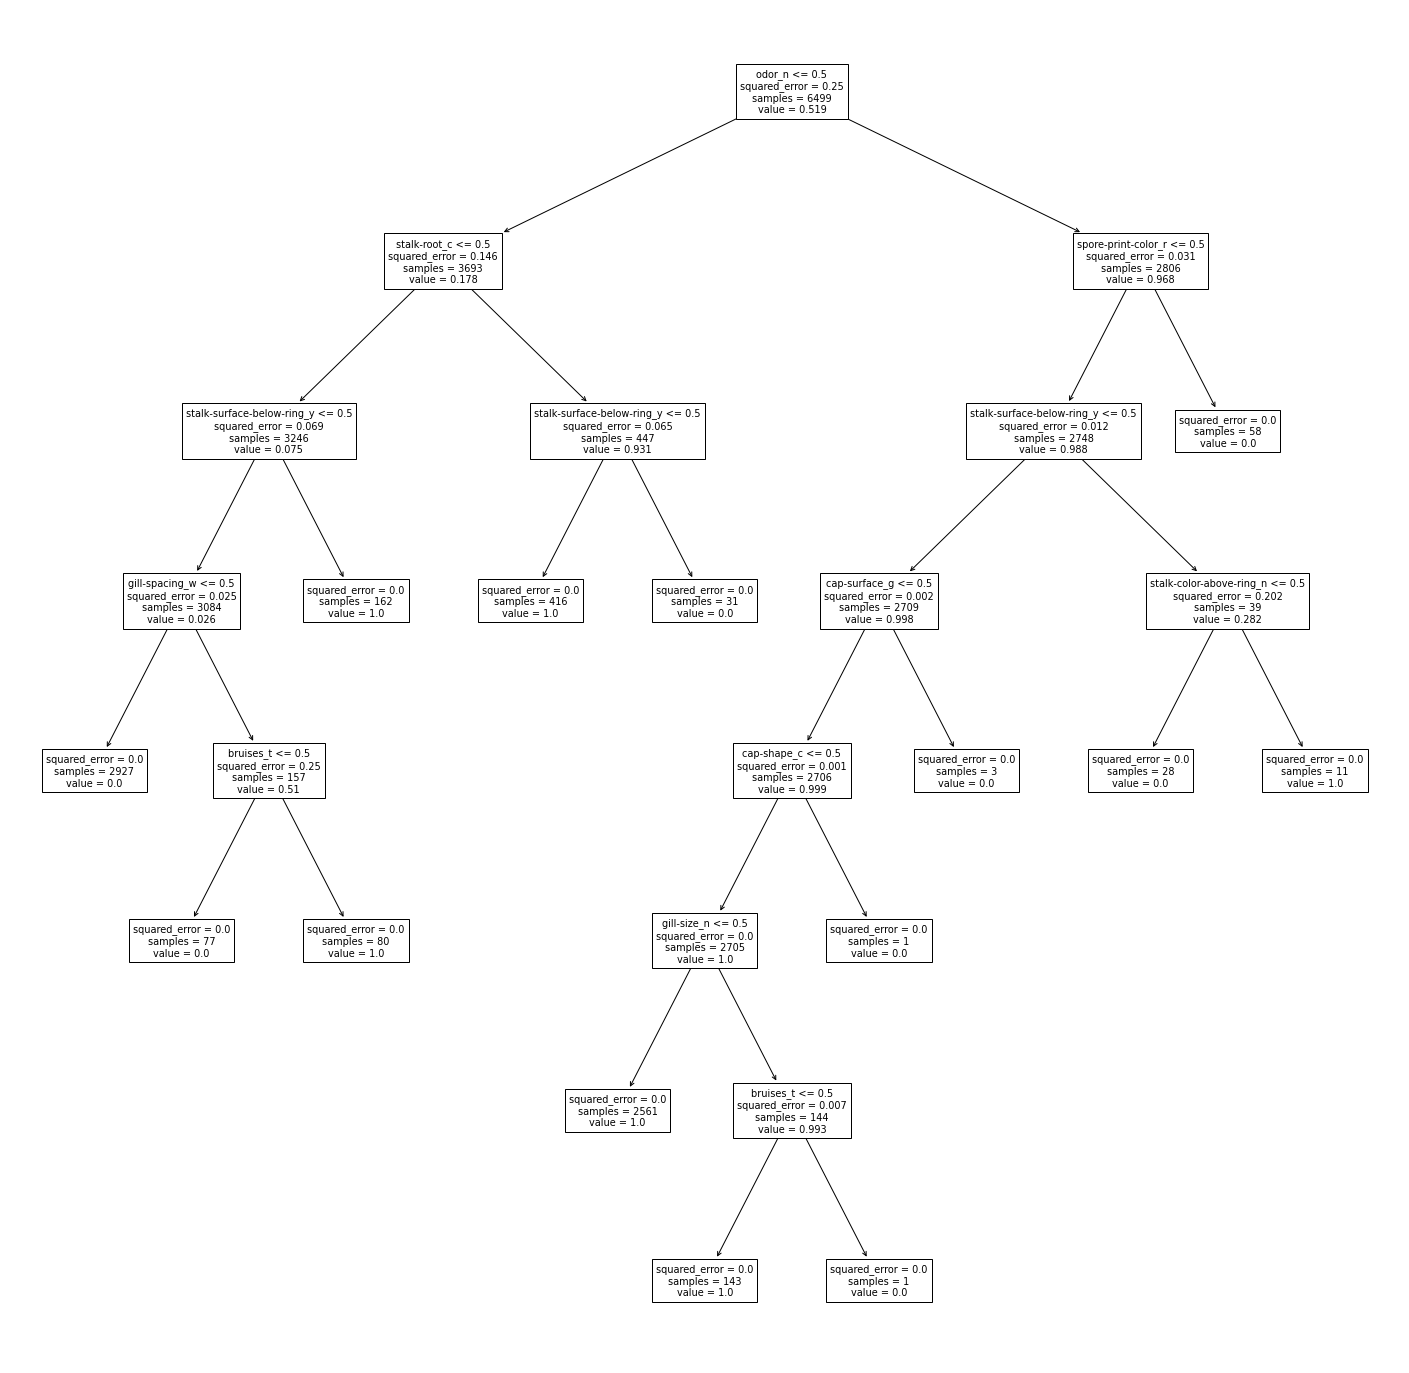

In [32]:
# Display the generated tree
from sklearn.tree import plot_tree
_, ax = plt.subplots(figsize=(25, 25))
encoded_cols = final_pipeline_model.named_steps['columntransformer'].transformers_[0][1].get_feature_names_out()
plot_tree(final_pipeline_model.named_steps['decisiontreeregressor'], ax=ax, feature_names = encoded_cols)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0567b97a50>]],
      dtype=object)

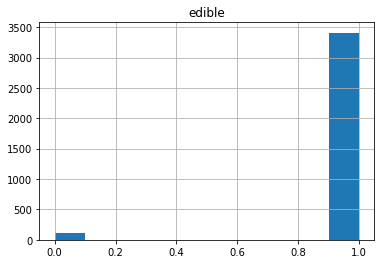

In [34]:
# Visualize the "edibleness" differentiaton of the top tree node (odor_n: no odor)
encoded_cols = final_pipeline_model.named_steps['columntransformer'].transformers_[0][1].get_feature_names_out()
raw[raw.odor == "n"].hist(column="edible")

In [35]:
# List the importance of the features used by the decision tree, ignoring features with importance == 0

from matplotlib import pyplot

tree = final_pipeline_model.named_steps['decisiontreeregressor']
importance = tree.feature_importances_
l = []
for i,v in zip(encoded_cols, importance):
  if v > 0:
    l.append((i, v))
l.sort(key=lambda tup:tup[1], reverse=True)
l

[('odor_n', 0.6124207924327031),
 ('stalk-root_c', 0.1774852858389416),
 ('stalk-surface-below-ring_y', 0.1199448773451387),
 ('spore-print-color_r', 0.034174682498680185),
 ('bruises_t', 0.024795763383161074),
 ('gill-spacing_w', 0.02384678832501013),
 ('stalk-color-above-ring_n', 0.004867739532711966),
 ('cap-surface_g', 0.001844331798412557),
 ('cap-shape_c', 0.000615686363758361),
 ('gill-size_n', 4.052481482277812e-06)]